### Student Name: 

In [1]:
#TODO: import the modules
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn import tree

### Step 1 – Explain any overfitting or underfitting in the previous model

In [2]:
## From my understanding, it looks as if the previous model is overfit. While the tree had a very high accuracy
## score, the tree was definitely overfit. Because of this, it would be necessary to use another method to create
## the decision tree model and see if the new tree is better.

### Step 2 – Load the data and extract the features

In [3]:
#TODO: load the data and extract the features: 'VendorID', RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip'

features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 
            'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 
            'total_amount', 'trip_type', 'congestion_surcharge', 'tip']

file_path = '/Users/roshnaey/Desktop/trip_data.csv'

df = pd.read_csv(file_path, usecols=features)
type('tip')

str

### Step 3 – Split the data
The test set should comprise 30% of the dataset. Ensure the data is randomized and that stratified samples are obtained.

In [4]:
X = df.iloc[:,0:14].to_numpy() #input features
y = df.iloc[:,14].tolist() #labels

#TODO: Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3 , #TODO: provide the test_size (refer to the instructions for the assignment)
                                                    random_state = 7, #seed the random generator for reproducibilty
                                                    stratify = y
                                                   )

### Step 4 – Instantiate the Decision Tree Classifer

In [5]:
dt_estimator = DecisionTreeClassifier()

### Step 5 – Create a dictionary that contains the decision tree parameters

In [6]:
params = {
    'criterion': ['gini', 'entropy'], #a list of options for criterion.
    'max_depth': [7, 9, 13], #TODO: provide a list of three numbers between 5 and 15 inclusive.
    'min_samples_split':[101, 102, 201, 202, 301, 302, 401, 402, 490, 498] #TODO: provide a list of ten numbers between 100 and 500.
}

### Step 6 – Perform the Random search
Provide the dictionary from step 5 above and use the decison tree from step 4 as the estimator.

In [7]:
rand_search = RandomizedSearchCV(estimator=dt_estimator, 
                                 param_distributions=params, 
                                 random_state=7, 
                                 scoring='accuracy', 
                                 verbose= 3, #display messages while training
                                 n_iter= 51,   #TODO: set n_iter to a value between 50 and 100
                                 cv=10 ) #TODO: set the number of folds to 10 for the cross validation


In [8]:
estimator = rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 51 candidates, totalling 510 fits
[CV] min_samples_split=102, max_depth=7, criterion=entropy ...........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=102, max_depth=7, criterion=entropy, score=0.716, total=   0.4s
[CV] min_samples_split=102, max_depth=7, criterion=entropy ...........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  min_samples_split=102, max_depth=7, criterion=entropy, score=0.708, total=   0.3s
[CV] min_samples_split=102, max_depth=7, criterion=entropy ...........


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  min_samples_split=102, max_depth=7, criterion=entropy, score=0.721, total=   0.3s
[CV] min_samples_split=102, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=102, max_depth=7, criterion=entropy, score=0.712, total=   0.3s
[CV] min_samples_split=102, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=102, max_depth=7, criterion=entropy, score=0.716, total=   0.3s
[CV] min_samples_split=102, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=102, max_depth=7, criterion=entropy, score=0.717, total=   0.3s
[CV] min_samples_split=102, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=102, max_depth=7, criterion=entropy, score=0.712, total=   0.3s
[CV] min_samples_split=102, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=102, max_depth=7, criterion=entropy, score=0.718, total=   0.3s
[CV] min_samples_split=102, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=102, max_depth=7, crit

[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed:  3.1min finished


In [9]:
print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_) #note: if the score is low, increase n_iter or adjust the values in step 5.

Best parameters: {'min_samples_split': 101, 'max_depth': 13, 'criterion': 'entropy'}
Best score: 0.8912826684052536


### Step 7 – Train the decision tree

In [10]:
#Instantiate the Decision Tree Classifer object 
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', #TODO: use the value from the random search results.
                                       max_depth= 13,#TODO: use the value from the random search results.
                                       min_samples_split= 101 #TODO: use the value from the random search results.
                                      )

#Train Decision Tree Classifer using the `fit` method
dt_classifier.fit(X_train, y_train)

#Make predictions with `X_test` and store the result in a variable called `y_pred
y_pred = dt_classifier.predict(X_test)

### Step 8 – Evaluate the accuracy

In [11]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
accuracy_score(y_test, y_pred)

0.8939766977492585

### Step 9 – Visualize the decision tree

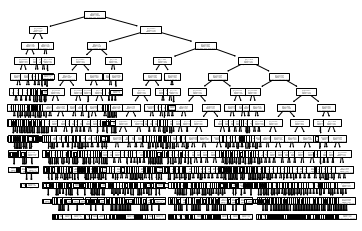

In [12]:
#TODO: Display the decision tree
decisiontree_plot = tree.plot_tree(dt_classifier.fit(X_train, y_train))

### Step 10 – Summarize the results using one paragraph (2-5 sentences)

In [ ]:
## Even though a different analytical technique was used to determine the best classifiers for the decision tree,
## It is very obvious that the decision tree is incredibly deep. Based off of the picture, it would appear that 
## the model was overfit and would not work efficiently with new data. 